In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import warnings
from scipy.stats import kendalltau
warnings.filterwarnings("ignore")

heart = pd.read_csv('/content/heart_updated.csv.xls')
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print("Heart data set dimensions : {}".format(heart.shape))

Heart data set dimensions : (897, 13)


In [5]:
heart.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [6]:
heart.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


age
0.4155884005156021


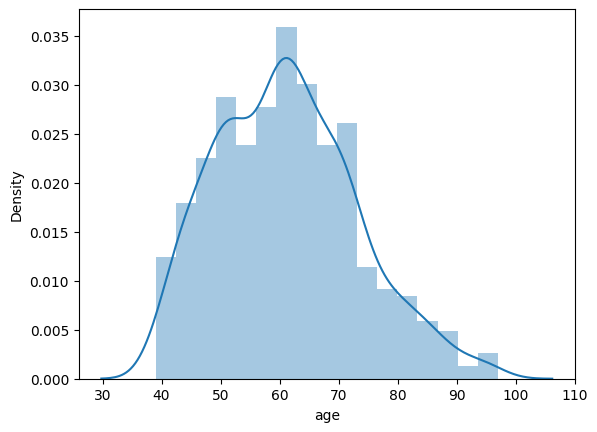

anaemia
0.27686275801578286


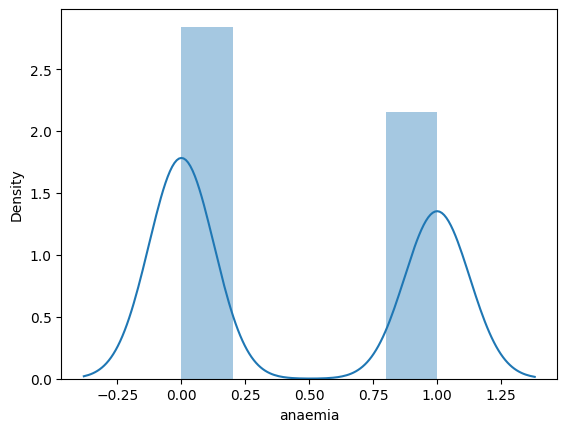

creatinine_phosphokinase
4.440658650016686


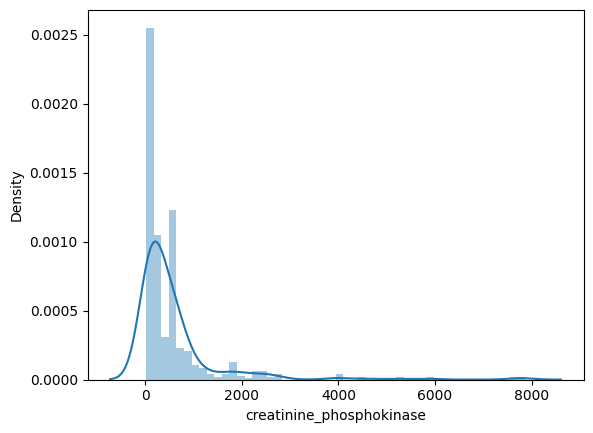

diabetes
0.3322511167741972


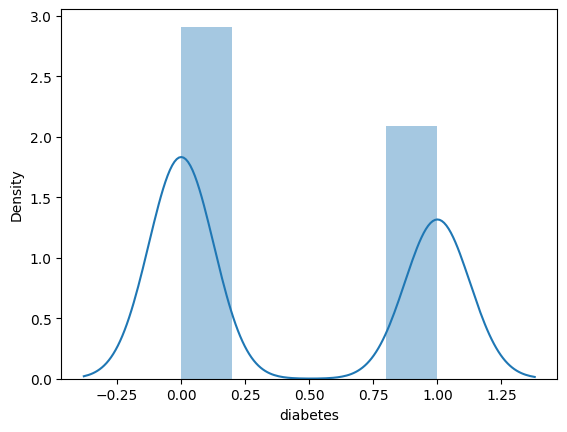

ejection_fraction
0.5048666171252733


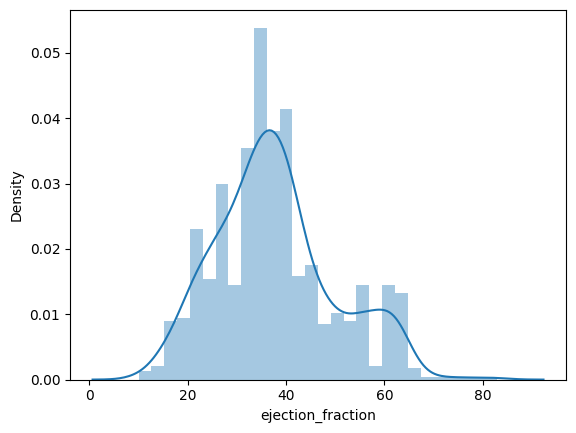

high_blood_pressure
0.6235833232384506


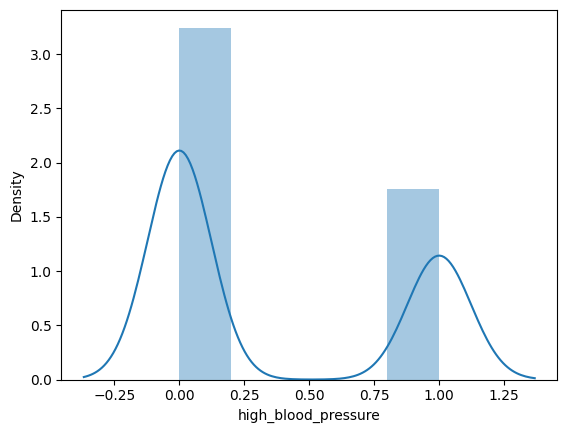

platelets
1.4527641578370476


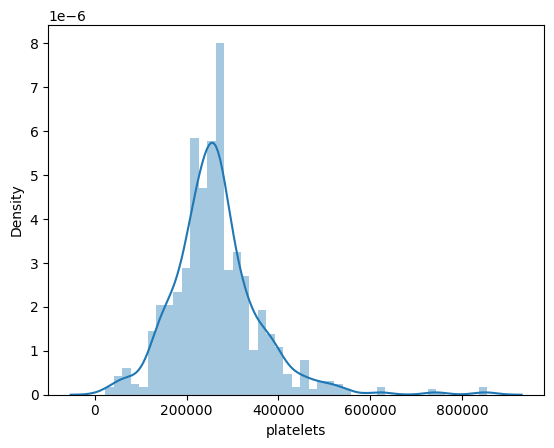

serum_creatinine
4.339018225781887


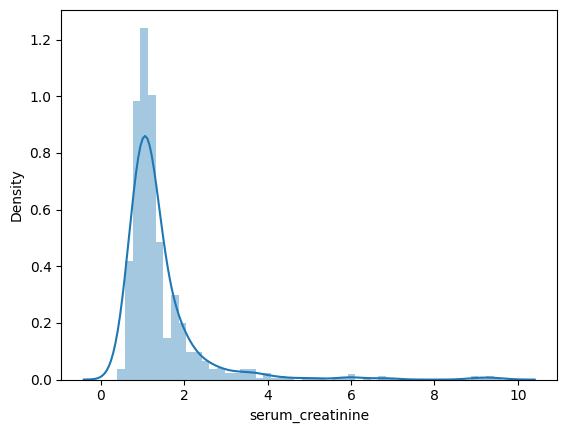

serum_sodium
-0.7581532637819652


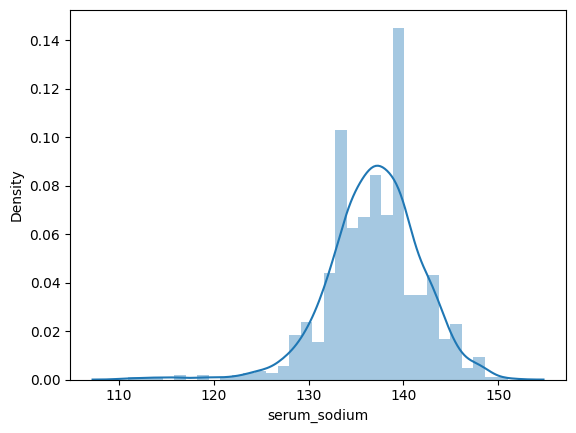

sex
-0.6235833232384504


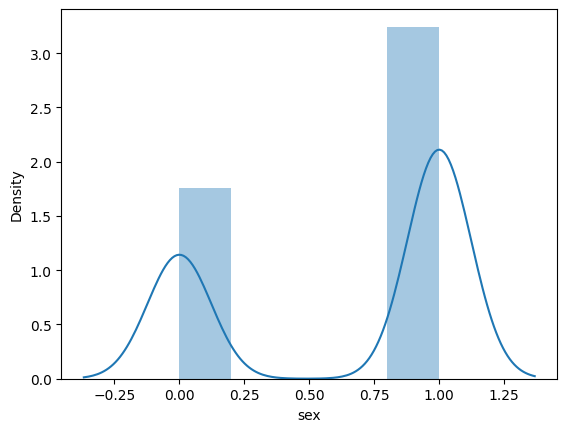

smoking
0.7664787911444256


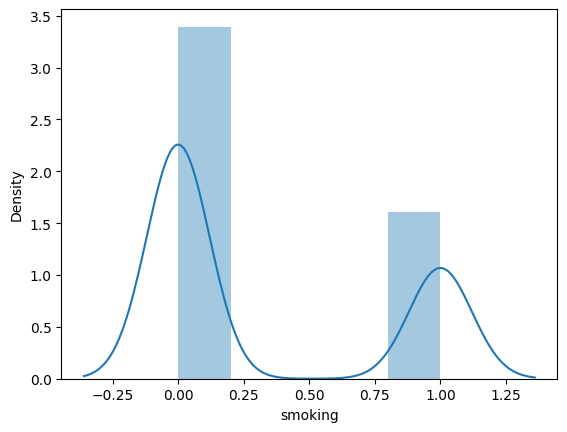

time
0.12697589446378155


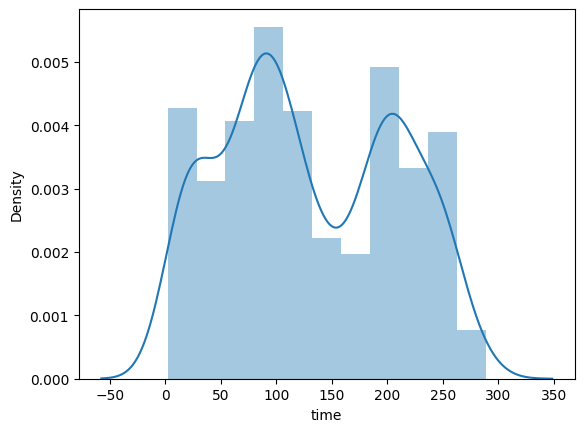

DEATH_EVENT
0.7664787911444255


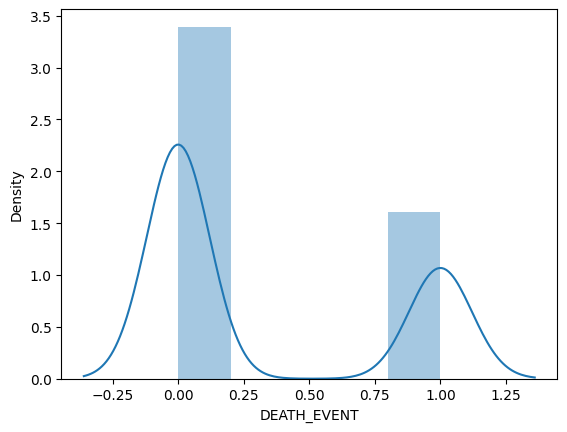

In [7]:
from scipy.stats import skew

for col in heart:
    print(col)
    print(skew(heart[col]))

    plt.figure()
    sns.distplot(heart[col])
    plt.show()

In [8]:
skew = heart.skew()
print(skew)

age                         0.416285
anaemia                     0.277327
creatinine_phosphokinase    4.448100
diabetes                    0.332808
ejection_fraction           0.505713
high_blood_pressure         0.624628
platelets                   1.455199
serum_creatinine            4.346290
serum_sodium               -0.759424
sex                        -0.624628
smoking                     0.767763
time                        0.127189
DEATH_EVENT                 0.767763
dtype: float64


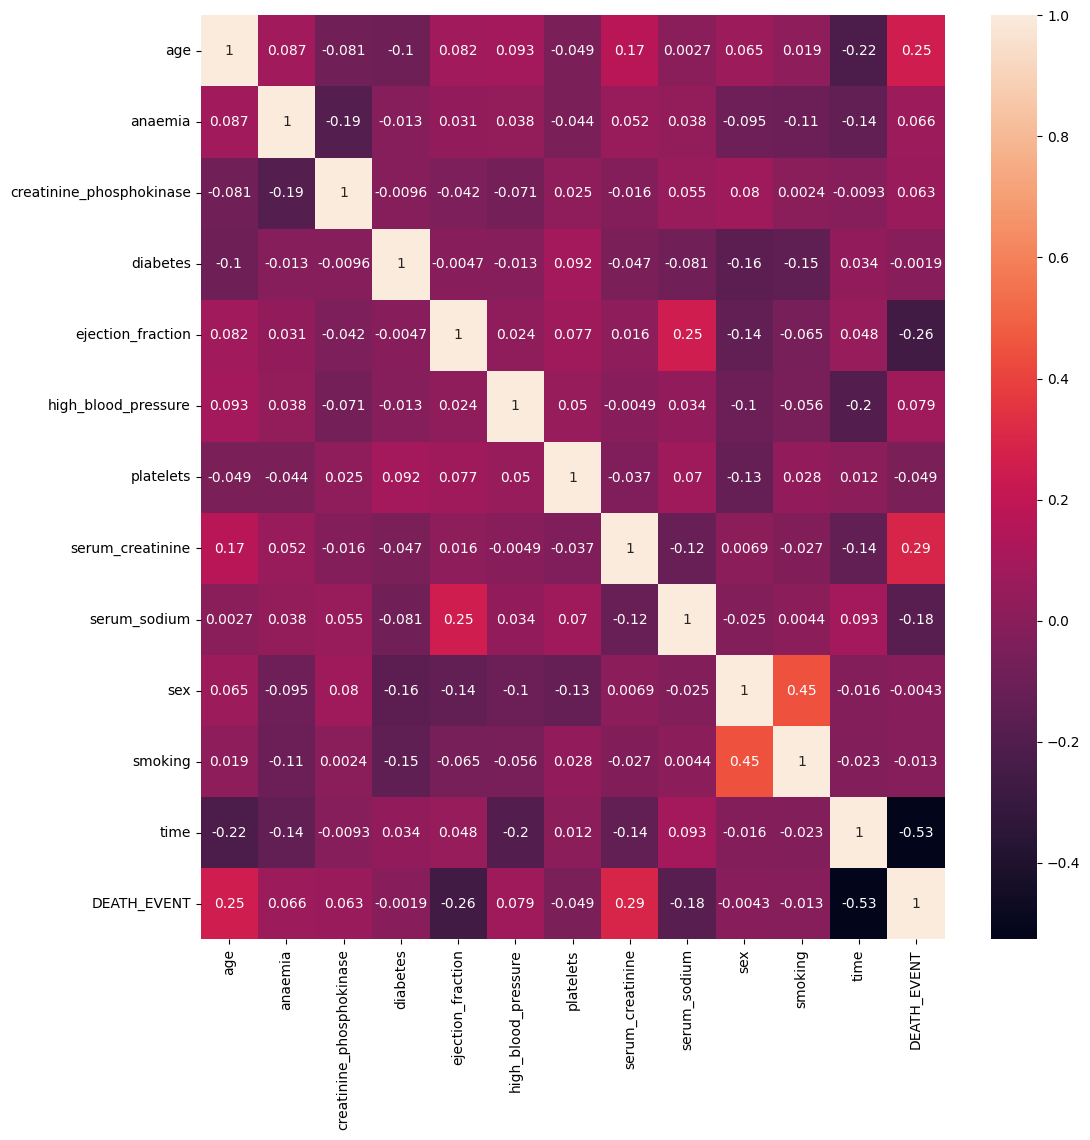

In [9]:
plt. ax = plt.subplots(figsize=(12,12))
sns.heatmap(heart.corr(),annot=True, annot_kws={'size':10})
plt.show()

In [10]:
from scipy.stats import skew

heart["creatinine_phosphokinase"] = np.cbrt(heart["creatinine_phosphokinase"])
heart["serum_creatinine"] = np.cbrt(heart["serum_creatinine"])
#heart["serum_sodium"] = np.cbrt(heart["serum_sodium"])


age
0.4155884005156021


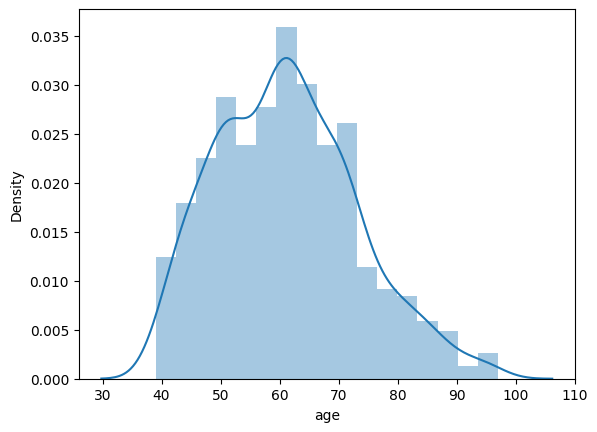

anaemia
0.27686275801578286


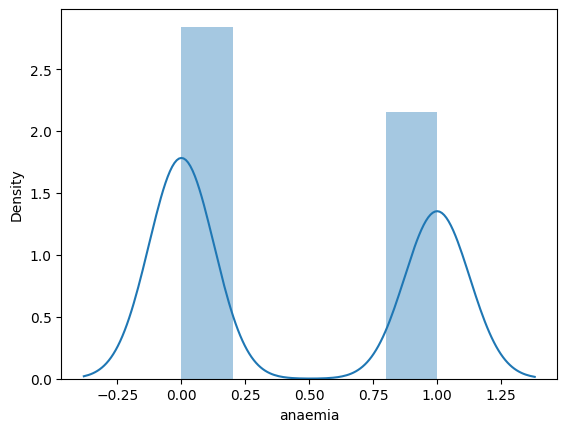

creatinine_phosphokinase
1.4315480781989516


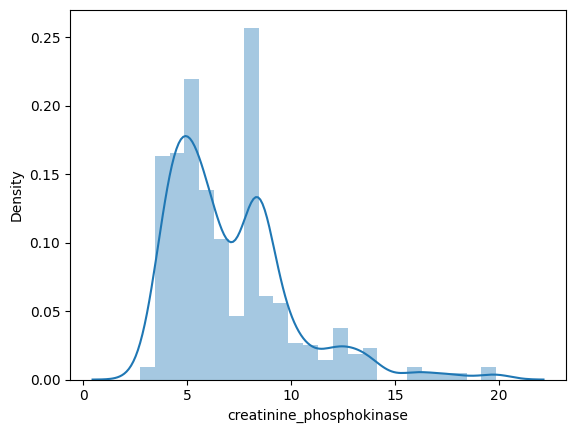

diabetes
0.3322511167741972


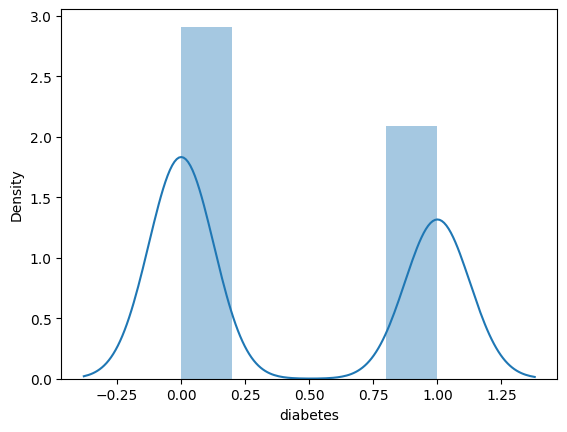

ejection_fraction
0.5048666171252733


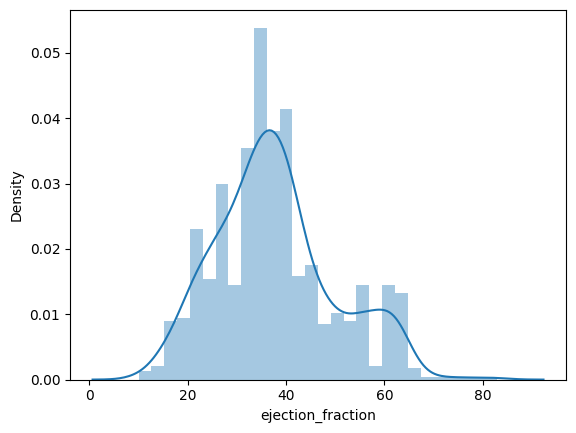

high_blood_pressure
0.6235833232384506


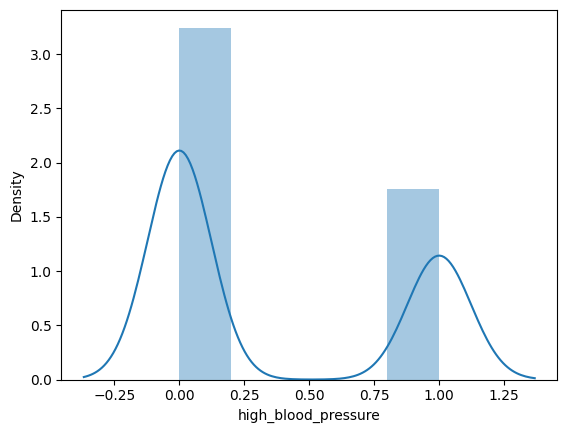

platelets
1.4527641578370476


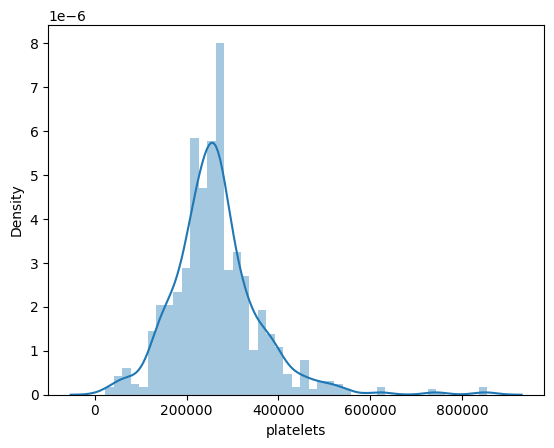

serum_creatinine
2.1830266947145196


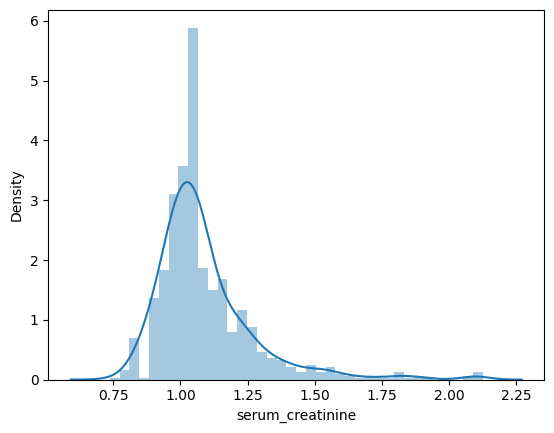

serum_sodium
-0.7581532637819652


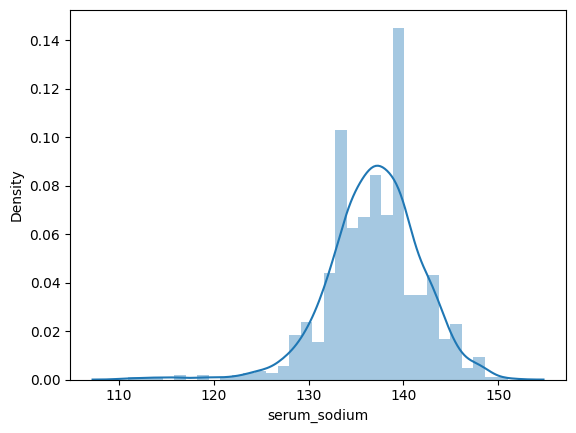

sex
-0.6235833232384504


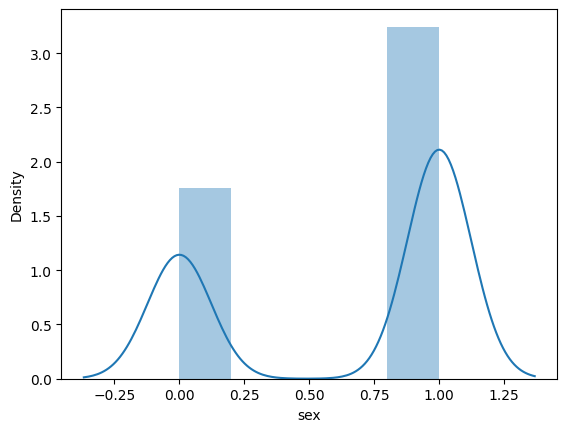

smoking
0.7664787911444256


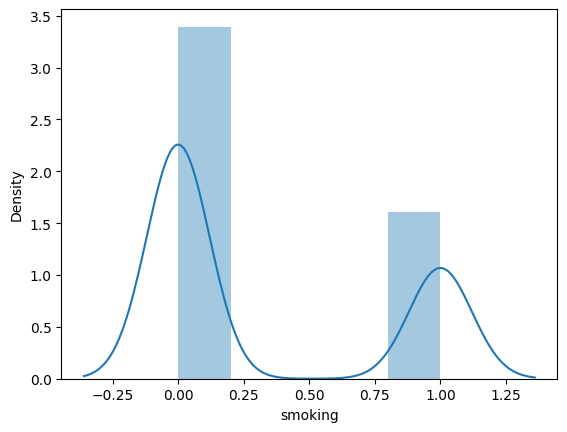

time
0.12697589446378155


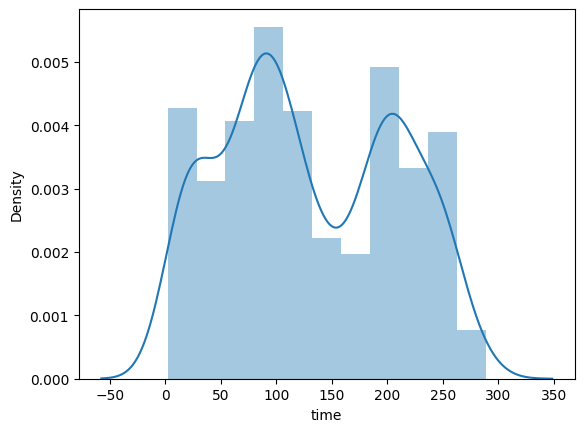

DEATH_EVENT
0.7664787911444255


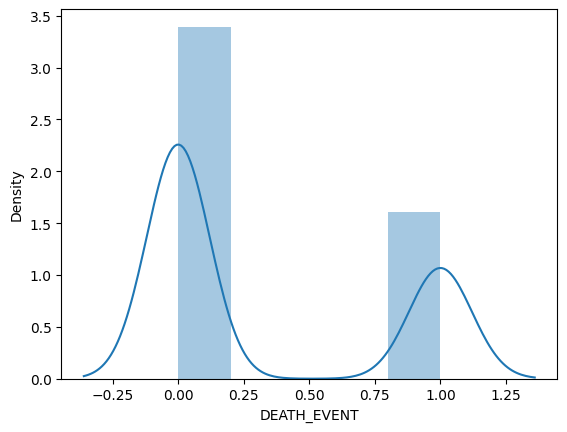

In [11]:
from scipy.stats import skew

for col in heart:
    print(col)
    print(skew(heart[col]))

    plt.figure()
    sns.distplot(heart[col])
    plt.show()


In [12]:
skew = heart.skew()
print(skew)

age                         0.416285
anaemia                     0.277327
creatinine_phosphokinase    1.433947
diabetes                    0.332808
ejection_fraction           0.505713
high_blood_pressure         0.624628
platelets                   1.455199
serum_creatinine            2.186685
serum_sodium               -0.759424
sex                        -0.624628
smoking                     0.767763
time                        0.127189
DEATH_EVENT                 0.767763
dtype: float64


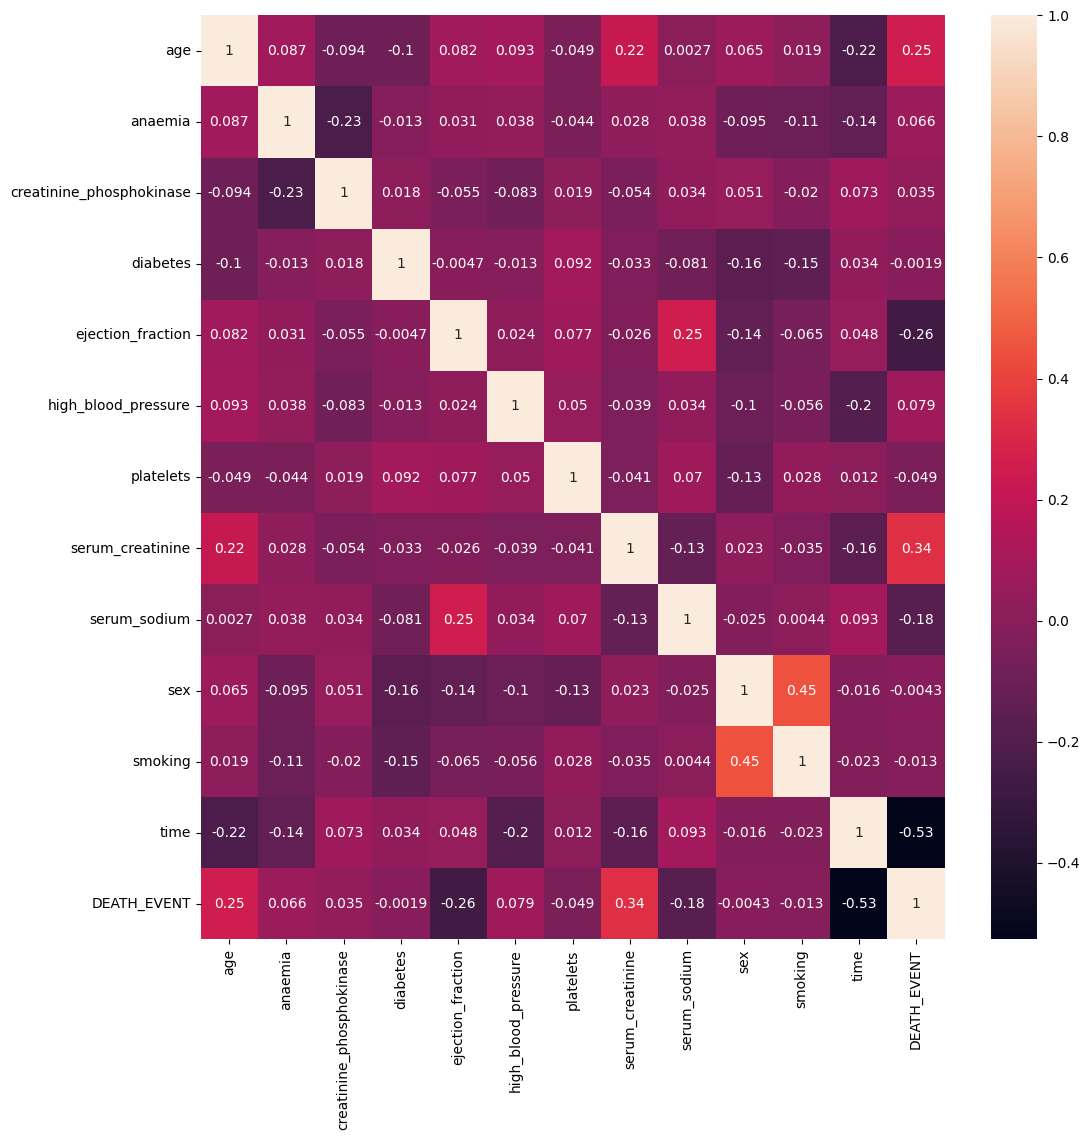

In [13]:
plt. ax = plt.subplots(figsize=(12,12))
sns.heatmap(heart.corr(),annot=True, annot_kws={'size':10})
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

#heart = pd.read_csv('heart1234.csv')

feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
                    'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
                    'sex', 'smoking', 'DEATH_EVENT']

# Calculate Kendall's tau for each feature with the target variable
kendall_correlations = {}
for col in feature_names:
    tau, _ = kendalltau(heart[col], heart['DEATH_EVENT'])
    kendall_correlations[col] = abs(tau)

# Convert the dictionary to a DataFrame for easier plotting
kendall_heart = pd.DataFrame.from_dict(kendall_correlations, orient='index', columns=['Kendall_Tau'])

# Sort the DataFrame based on Kendall's tau values
kendall_heart_sorted = kendall_heart.sort_values(by='Kendall_Tau', ascending=False)


In [15]:
kendall_heart

,Kendall_Tau
age,0.181327
anaemia,0.066270
creatinine_phosphokinase,0.019208
diabetes,0.001943
ejection_fraction,0.232270
high_blood_pressure,0.079351
platelets,0.038391
serum_creatinine,0.296540
serum_sodium,0.151533
sex,0.004316


In [16]:
kendall_heart_sorted

,Kendall_Tau
DEATH_EVENT,1.000000
serum_creatinine,0.296540
ejection_fraction,0.232270
age,0.181327
serum_sodium,0.151533
high_blood_pressure,0.079351
anaemia,0.066270
platelets,0.038391
creatinine_phosphokinase,0.019208
smoking,0.012623


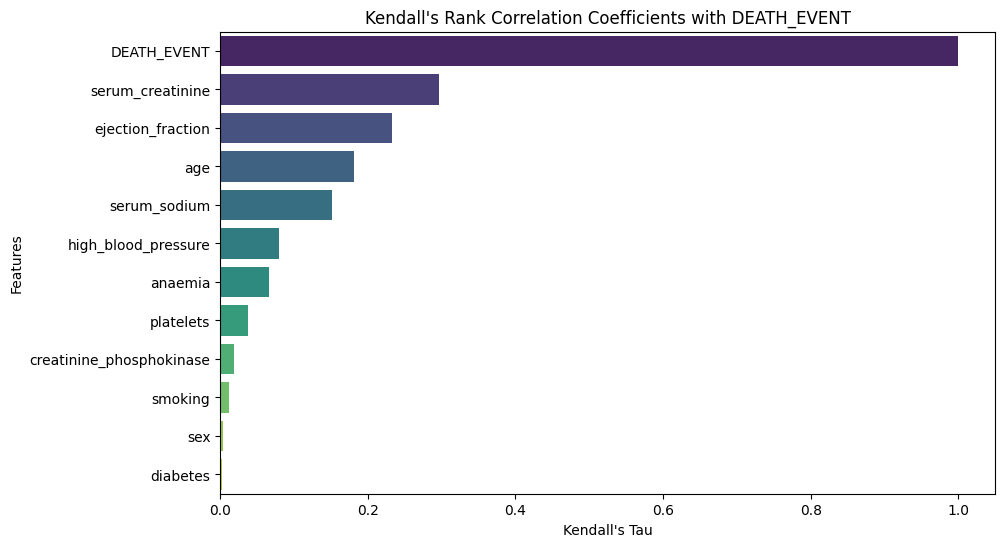

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kendall_heart_sorted['Kendall_Tau'], y=kendall_heart_sorted.index, palette='viridis')
plt.title("Kendall's Rank Correlation Coefficients with DEATH_EVENT")
plt.xlabel("Kendall's Tau")
plt.ylabel("Features")
plt.show()

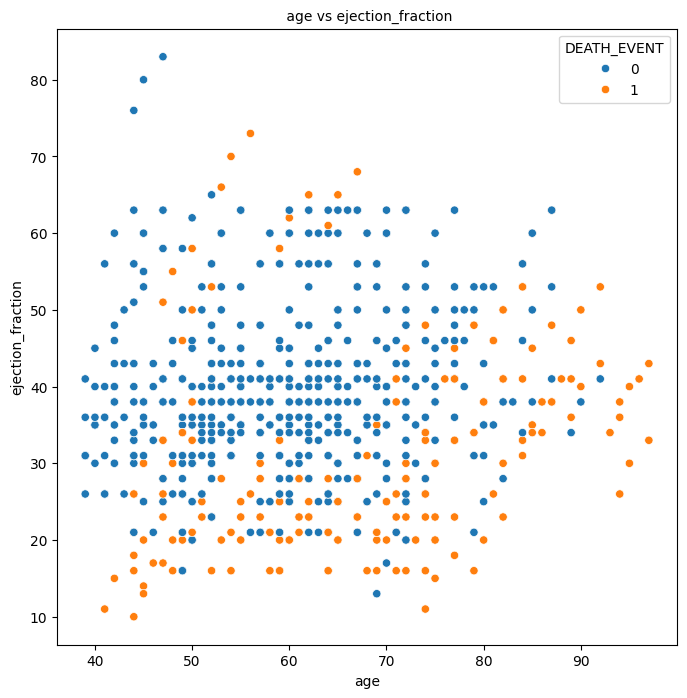

In [18]:
#Scattered Graph
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
sns.scatterplot(x= "age", y= "ejection_fraction" , hue="DEATH_EVENT",data=heart)
plt.title(" age vs ejection_fraction",fontsize =10)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(heart, test_size=0.30)

print(train.shape)
print(test.shape)

print(heart.shape)

(627, 13)
(270, 13)
(897, 13)


In [56]:
#feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       #'ejection_fraction', 'high_blood_pressure', 'platelets',
       #'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       #'DEATH_EVENT']
feature_names = ['serum_creatinine', 'ejection_fraction', 'age' ]

X = heart[feature_names]
y = heart.DEATH_EVENT

In [57]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [58]:
models = []


models.append(('RF', RandomForestClassifier()))
#models.append(('LR', LogisticRegression()))
#models.append(('GNB', GaussianNB()))
#models.append(('SVC', SVC()))
#models.append(('KNN', KNeighborsClassifier()))

#models.append(('DT', DecisionTreeClassifier()))
#models.append(('GB', GradientBoostingClassifier()))


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = heart.DEATH_EVENT, random_state=0)

In [61]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(X_train, y_train)
y_predict=model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.83      0.75      0.78       153
           1       0.55      0.67      0.60        72

    accuracy                           0.72       225
   macro avg       0.69      0.71      0.69       225
weighted avg       0.74      0.72      0.73       225

[[114  39]
 [ 24  48]]


In [62]:
MLA = [RandomForestClassifier()]

In [63]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:


    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
MLA_compare


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,RandomForestClassifier,0.9926,0.7111,0.541176,0.638889,0.691993


In [64]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

    tr_split = pd.DataFrame({'Name': names, 'Score': scores})

    print(tr_split)


  Name     Score
0   RF  0.737778


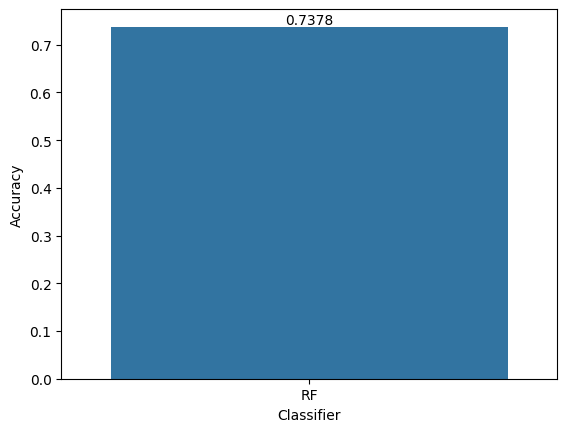

In [65]:
names = []
scores = []

axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
names = []
scores = []

for name, model in models:

    kfold = KFold(n_splits=10, shuffle=True, random_state=10)
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()

    names.append(name)
    #kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
    scores.append(score)
    kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
    print(kf_cross_val)

  Name    Score
0   RF  0.77799


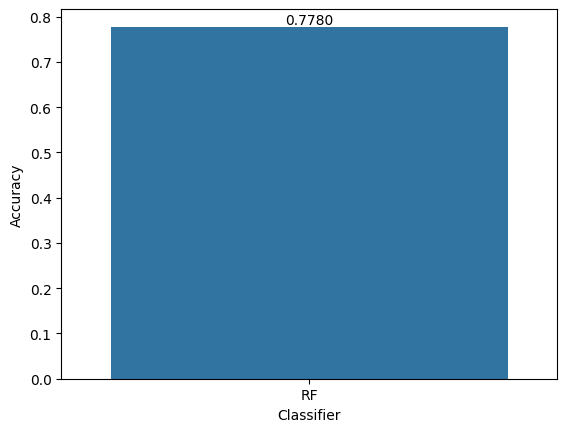

In [68]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()


In [77]:
input_data = (1.3,25,65)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
